(test-functions:speed-reducer-shaft)=
# Speed Reducer Shaft

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The speed reducer shaft test function is a five-dimensional scalar-valued
test function introduced in {cite}`Du2004`. It is used as a test function for reliability
analysis algorithms (see, for instance, {cite}`Du2004, Li2018`).

## Test function instance

To create a default instance of the test function:

In [2]:
my_testfun = uqtf.SpeedReducerShaft()

Check if it has been correctly instantiated:

In [3]:
print(my_testfun)

Name              : SpeedReducerShaft
Spatial dimension : 5
Description       : Reliability of a shaft in a speed reducer from Du and Sudjianto (2004)


## Description

The function models the performance of a shaft in a speed reducer {cite}`Du2004`.
The performance is defined as the strength of the shaft subtracted by the
stress as follows[^location]:

$$
g(\boldsymbol{x}) = S - \frac{32}{\pi D^3} \sqrt{\frac{F^2 L^2}{16} + T^2},
$$

where $\boldsymbol{x} = \{ S, D, F, L, T \}$
is the five-dimensional vector of input variables probabilistically defined
further below.

The failure event and the failure probability are defined as
$g(\boldsymbol{x}) \leq 0$ and $\mathbb{P}[g(\boldsymbol{X}) \leq 0]$,
respectively.

## Probabilistic input

Based on {cite}`Du2004`, the probabilistic input model
for the speed reducer shaft reliability problem consists of five independent
random variables with marginal distributions shown in the table below.

In [4]:
my_testfun.prob_input

ProbInput(spatial_dimension=5, marginals=(UnivDist(distribution='normal', parameters=array([39. ,  0.1]), name='D', description='Shaft diameter [mm]'), UnivDist(distribution='normal', parameters=array([4.e+02, 1.e-01]), name='L', description='Shaft span [mm]'), UnivDist(distribution='gumbel', parameters=array([1342.48137736,  272.89388043]), name='F', description='External force [N]'), UnivDist(distribution='normal', parameters=array([250,  35]), name='T', description='Torque [Nm]'), UnivDist(distribution='uniform', parameters=array([70, 80]), name='S', description='Strength [MPa]')), copulas=None, name='SpeedReducerShaft-Du2004', description='Input model for the speed reducer shaft problem from Du and Sudjianto (2004)')

Note that the variables $F$, $D$, and $L$ must be first converted to their
corresponding SI units (i.e., $[\mathrm{Pa}]$, $[\mathrm{m}]$,
and $[\mathrm{m}]$, respectively) before the values are plugged
into the formula above.


## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $10^6$ random points:

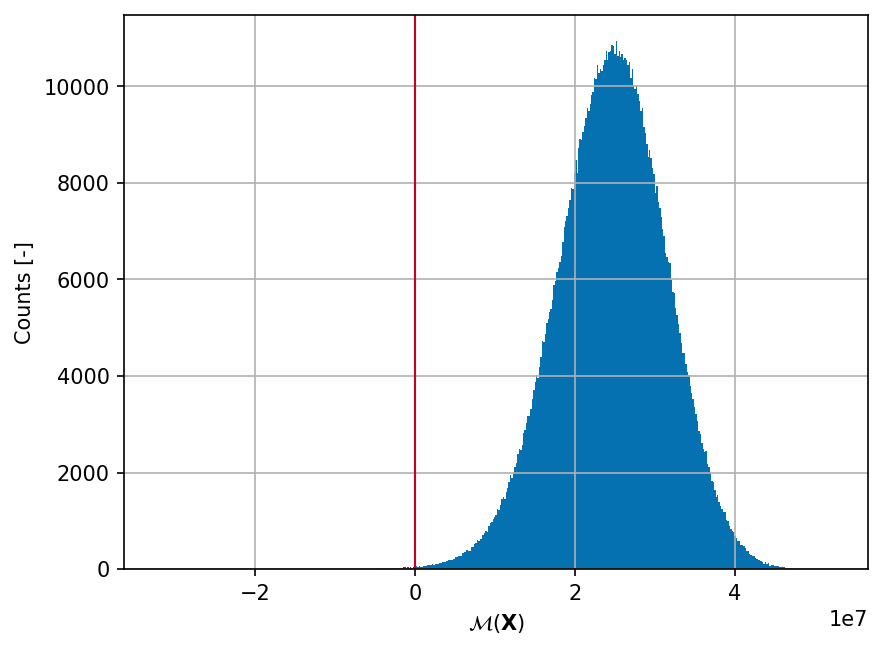

In [5]:
xx_test = my_testfun.prob_input.get_sample(1000000)
yy_test = my_testfun(xx_test)
idx_pos = yy_test > 0
idx_neg = yy_test <= 0

hist_pos = plt.hist(yy_test, bins="auto", color="#0571b0")
plt.hist(yy_test[idx_neg], bins=hist_pos[1], color="#ca0020")
plt.axvline(0, linewidth=1.0, color="#ca0020")

plt.grid()
plt.ylabel("Counts [-]")
plt.xlabel("$\mathcal{M}(\mathbf{X})$")
plt.gcf().set_dpi(150);

### Failure probability

Some reference values for the failure probability $P_f$ and from the literature
are summarized in the table below.

|    Method     |   $N$   |       $\hat{P}_f$       | $\mathrm{CoV}[\hat{P}_f]$ |           Source           |
|:-------------:|:-------:|:-----------------------:|:-------------------------:|:--------------------------:|
|  {term}`MCS`  | $10^6$  | $7.850 \times 10^{-4}$  |          &#8212;          | {cite}`Du2004` (Table 11)  |
| {term}`FORM`  | $1'472$ | $7.007 \times 10^{-7}$  |          &#8212;          | {cite}`Du2004` (Table 11)  |
| {term}`SORM`  | $1'514$ | $4.3581 \times 10^{-7}$ |          &#8212;          | {cite}`Du2004` (Table 11)  |
| {term}`FOSPA` |  $102$  | $6.1754 \times 10^{-4}$ |          &#8212;          | {cite}`Du2004` (Table 11)  |

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```

[^location]: see Eq. (34), p. 1205 in {cite}`Du2004`.